In [1]:
cd drive/MyDrive/JAIST/Research/RL/movie-lens-simulator

/content/drive/MyDrive/JAIST/Research/RL/movie-lens-simulator


In [15]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 1.1 MB 35.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c968e0ed1a04ffae09914076f67ae4c9dd2168e0cb3686bcae7b8126e085c72f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=eeedfcede0ed9edff2690ec209ac97f0fb0a00de0fe569a3fc4a23d5bc8b5f99
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [2]:
import torch

In [20]:
from src.data.movielens1M import LoadMovielens1M, PreprocessMovielens1M
from configs.config import CFG_DICT

load_rawML1M = LoadMovielens1M(path=CFG_DICT['DATASET']['PATH'])
raw_datas = load_rawML1M.load_data()

preprocessML1M = PreprocessMovielens1M(raw_datas)
preprocess_datas = preprocessML1M.apply_prepocess()

ratings, users, movies, histories = preprocess_datas

In [3]:
user_model_path = './log/train_usr/user_simulator.pkl'
user_model_w = torch.load(user_model_path)

In [6]:
user_model_w.keys()

odict_keys(['user_rep.user_embedding.weight', 'user_rep.gender_embedding.weight', 'user_rep.age_embedding.weight', 'user_rep.occup_embedding.weight', 'user_rep.zip_embedding.weight', 'item_rep.item_embedding.weight', 'item_rep.year_embedding.weight', 'item_rep.genre_linear.weight', 'item_rep.genre_linear.bias', 'history_rep.history_linear.weight', 'history_rep.history_linear.bias', 'linear.0.weight', 'linear.0.bias', 'linear.2.weight', 'linear.2.bias', 'linear.5.weight', 'linear.5.bias', 'linear.8.weight', 'linear.8.bias', 'linear.11.weight', 'linear.11.bias'])

In [60]:
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm

In [61]:
def get_cluster_loss(inp: np.array, n_cluster_array: np.array):
    loss = []
    for i  in tqdm(n_cluster_array): 
        km = KMeans(n_clusters=i,
                    n_init=10,
                    max_iter=300,
                    random_state=0)
        km.fit(inp)
        loss.append(km.inertia_)
    return loss

100%|██████████| 13/13 [18:29<00:00, 85.37s/it] 


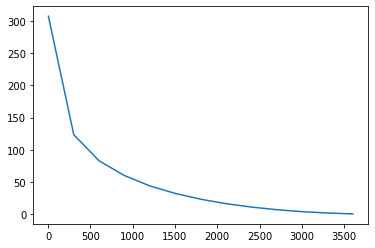

In [ ]:
item_embedding = user_model_w[ 'item_rep.item_embedding.weight'].cpu().numpy()

plt.plot(np.arange(3, 3883, 300), get_cluster_loss(item_embedding, np.arange(3, 3883, 300)))
plt.show()

100%|██████████| 21/21 [1:43:15<00:00, 295.01s/it]


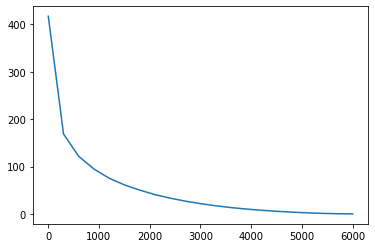

In [ ]:
user_embedding = user_model_w[ 'user_rep.user_embedding.weight'].cpu().numpy()

plt.plot(np.arange(3, 6040, 300), get_cluster_loss(user_embedding, np.arange(3, 6040, 300)))
plt.show()

In [50]:
user_embedding = user_model_w[ 'user_rep.gender_embedding.weight'].cpu().numpy()

plt.plot(np.arange(3, 5), get_cluster_loss(user_embedding, np.arange(3,5)))
plt.show()

ValueError: ignored

In [52]:
user_embedding.shape

(2, 20)

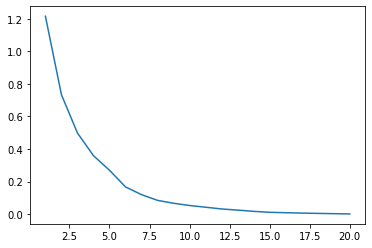

In [56]:
user_embedding = user_model_w[ 'user_rep.occup_embedding.weight'].cpu().numpy()

plt.plot(np.arange(1, 21), get_cluster_loss(user_embedding, np.arange(1,21)))
plt.show()